In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
import csv

In [141]:
df_Online_Sales = pd.read_csv('/content/Online_Sales.csv')
# Convert the date column to datetime format
df_Online_Sales['Transaction_Date'] = pd.to_datetime(df_Online_Sales['Transaction_Date'])
print(f"Original Sales Data:\n {df_Online_Sales.head(5)}")

Original Sales Data:
    CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  
0         1     153.71               6.5          Used  
1         1     153.71      

In [142]:
# Copy original data to another dataframe
df_acquisition_data = df_Online_Sales.copy()
# Extract the first transaction month for each customer
first_transaction_month = df_acquisition_data.groupby('CustomerID')['Transaction_Date'].min()
# Count acquisition for each month
acquisition_months = first_transaction_month.dt.month.value_counts().sort_index()
# Map month numbers to names
month_names = {
1: 'January', 2: 'February', 3: 'March', 4: 'April',
5: 'May', 6: 'June', 7: 'July', 8: 'August',
9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
acquisition_months.index = acquisition_months.index.map(month_names)
print(f"Highest acquisition month: {acquisition_months.idxmax()} with total acquisitions {acquisition_months.max()}")
print(f"Lowest acquisition month: {acquisition_months.idxmin()} with total acquisitions {acquisition_months.min()}")

Highest acquisition month: January with total acquisitions 215
Lowest acquisition month: November with total acquisitions 68


 To address the fluctuations and ensure consistent growth throughout the year, we can implement strategies like,
 
 Investigate what worked in high months like product launches, promotions, marketing etc. and what went wrong in low months.
 Perform Hypothesis testing on Discounts, Delivery charges
 Perform Paired T-Test on Gender from Customers_Data.csv and analyze which group shops more and send more promotional emails
 and discounts to improve the purchases
 Increase promotion of the products based on T Hypothesis testing on Offline or Online purchases

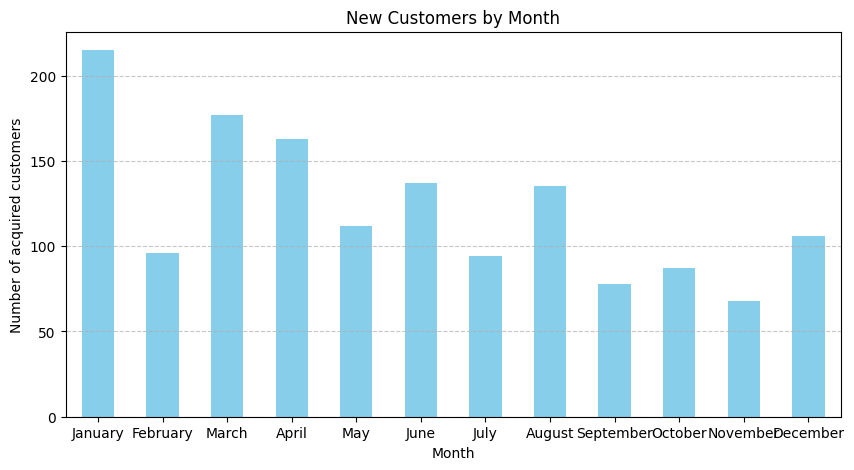

In [143]:
# Plot acquisition months
plt.figure(figsize=(10, 5))
acquisition_months.plot(kind='bar', color='skyblue')
plt.title('New Customers by Month')
plt.xlabel('Month')
plt.ylabel('Number of acquired customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

 Top-performing months: Jan, March, April Lower-performing months: Feb, Sep, Nov The company can determine which products are selling
 the most month-wise and increase promotions or launch a countdown to create urgencies. We can also use A/B testing and surveys to
 determine how the customer groups behave in high and low months. In peak months, engage existing customers with additional offerings.
 Determine why certain months are slow and factors influencing slow periods.

In [144]:
# Unique customers per month
df_acquisition_data['Month'] = df_acquisition_data['Transaction_Date'].dt.month
monthly_customers = df_acquisition_data.groupby('Month')['CustomerID'].nunique()
print(f"Monthly customers:\n {monthly_customers.head()}")
# Identify duplicated rows based on Month and CustomerID
transactions_count = df_acquisition_data.groupby(['Month', 'CustomerID']).size().reset_index(name= 'Count')
# Repeated customers
repeated_customers = transactions_count[transactions_count['Count'] > 1]
print(f"\nRepeated customers:\n {repeated_customers.head()}")
# Count how many repeated customers per month
repeated_customers_count = repeated_customers.groupby('Month')['CustomerID'].nunique()
print(f"\nRepeated customers each month:\n {repeated_customers_count.head()}")

Monthly customers:
 Month
1    215
2    109
3    208
4    224
5    200
Name: CustomerID, dtype: int64

Repeated customers:
    Month  CustomerID  Count
0      1       12431     14
1      1       12433     73
3      1       12472     14
4      1       12583     20
5      1       12662     15

Repeated customers each month:
 Month
1    195
2    105
3    193
4    200
5    173
Name: CustomerID, dtype: int64


In [145]:
# Calculate Retention Rates
retention_rates = (repeated_customers_count/monthly_customers).round(2)
retention_rates.rename('Retention Rate', inplace=True)
retention_rates.index = retention_rates.index.map(month_names)
print("Retention Rates per Month:\n", retention_rates)

Retention Rates per Month:
 Month
January      0.91
February     0.96
March        0.93
April        0.89
May          0.86
June         0.91
July         0.85
August       0.92
September    0.91
October      0.90
November     0.91
December     0.94
Name: Retention Rate, dtype: float64


In [146]:
print(f"Strongest Retention Rate of {retention_rates.max()} in {retention_rates.idxmax()} ")
print(f"Weakest Retention Rate of {retention_rates.min()} in {retention_rates.idxmin()} ")

Strongest Retention Rate of 0.96 in February 
Weakest Retention Rate of 0.85 in July 


To implement strategies to improve retention during weaker months, we can do,
 Product Analysis to check which products had lower repeat purchases and strategize targeted promotions.
 Coupon Status Analysis to assess how coupons affects retention and adjust offers accordingly.
 Time Analysis to analyze which months have low retention rates and implement campaigns

Product Analysis:
 Month  Product_Category
1      Accessories           1
       Android               4
       Apparel             960
       Backpacks             3
       Bags                155
Name: Purchase_Count, dtype: int64



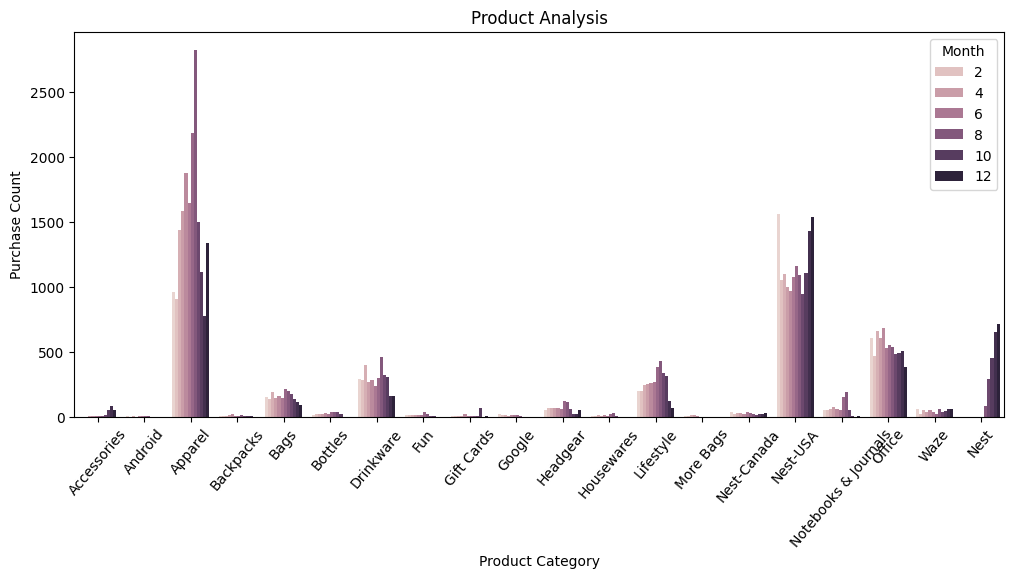

In [147]:
product_analysis = df_acquisition_data.groupby(['Month', 'Product_Category']).size()
product_analysis.rename("Purchase_Count", inplace=True)
print(f"Product Analysis:\n {product_analysis.head()}\n")
plt.figure(figsize=[12, 5])
sns.barplot(data=product_analysis.reset_index(), x='Product_Category', y='Purchase_Count', hue='Month')
plt.xlabel('Product Category')
plt.ylabel('Purchase Count')
plt.title("Product Analysis")
plt.xticks(rotation = 50)
plt.show()

 Categories (Accessories, Android, Backpacks etc) show consistent lower purchase count every month. Strategies like giving discounts, offers
 or target advertisements can be implemented to lure more customers in these categories

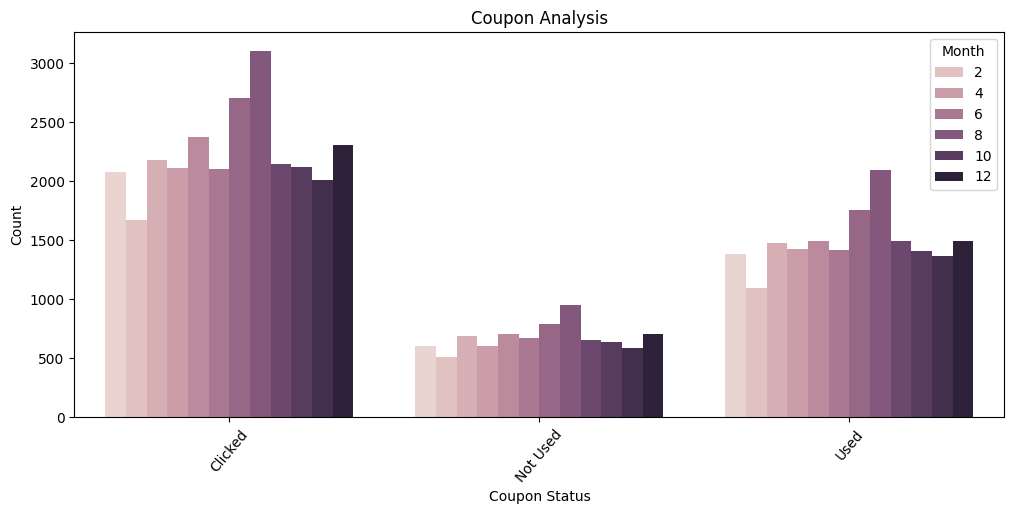

In [148]:
# Coupon Analysis
coupon_analysis = df_acquisition_data.groupby(['Month', 'Coupon_Status']).size()
coupon_analysis.rename('Count', inplace=True)

plt.figure(figsize=[12, 5])
sns.barplot(data=coupon_analysis.reset_index(), x='Coupon_Status', y='Count', hue='Month')
plt.xlabel('Coupon Status')
plt.ylabel('Count')
plt.title("Coupon Analysis")
plt.xticks(rotation = 50)
plt.show()

Retention rates for each month

In [149]:
# Analyze customer behavior during high-retention months and suggest ways to replicate this success throughout the year.
print(f"Retention Rates:\n {retention_rates}")
# Calculate retention rates for each month using previous values
retention_rates_by_month = repeated_customers_count/monthly_customers
# Find highest retention rate
highest_retention_month = retention_rates_by_month.idxmax()
print(f"\nHighest Retention Month: {highest_retention_month} with Retention rate {retention_rates.max()}")
# Filter highest retention month data from the main dataset
high_retention_data = df_acquisition_data[df_acquisition_data['Month'] == highest_retention_month]
print(f"\nHighest Retention Data:\n {high_retention_data.head()}")

Retention Rates:
 Month
January      0.91
February     0.96
March        0.93
April        0.89
May          0.86
June         0.91
July         0.85
August       0.92
September    0.91
October      0.90
November     0.91
December     0.94
Name: Retention Rate, dtype: float64

Highest Retention Month: 2 with Retention rate 0.96

Highest Retention Data:
       CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
4063       13370           19376       2019-02-01  GGOENEBB078899   
4064       13370           19376       2019-02-01  GGOENEBQ079199   
4065       13370           19377       2019-02-01  GGOEGAAJ032315   
4066       13370           19378       2019-02-01  GGOEAAWJ062549   
4067       13370           19378       2019-02-01  GGOEAAXC066428   

                                Product_Description Product_Category  \
4063          Nest Cam Indoor Security Camera - USA         Nest-USA   
4064  Nest Protect Smoke + CO White Wired Alarm-USA         Nest-USA   
4065    Googl

Analyze customer behavior during high-retention month (February), analyze product purchases, coupon usage, and product categories during
 that month

In [150]:
# Product Analysis for high retention month
product_analysis_high_retention_month = df_acquisition_data.groupby('Product_Category').size()
product_analysis_high_retention_month.rename('Purchase_Count', inplace=True)
product_analysis_high_retention_month.reset_index()
print(f"Purchase Count:\n {product_analysis_high_retention_month.head()}")

Purchase Count:
 Product_Category
Accessories      234
Android           43
Apparel        18126
Backpacks         89
Bags            1882
Name: Purchase_Count, dtype: int64


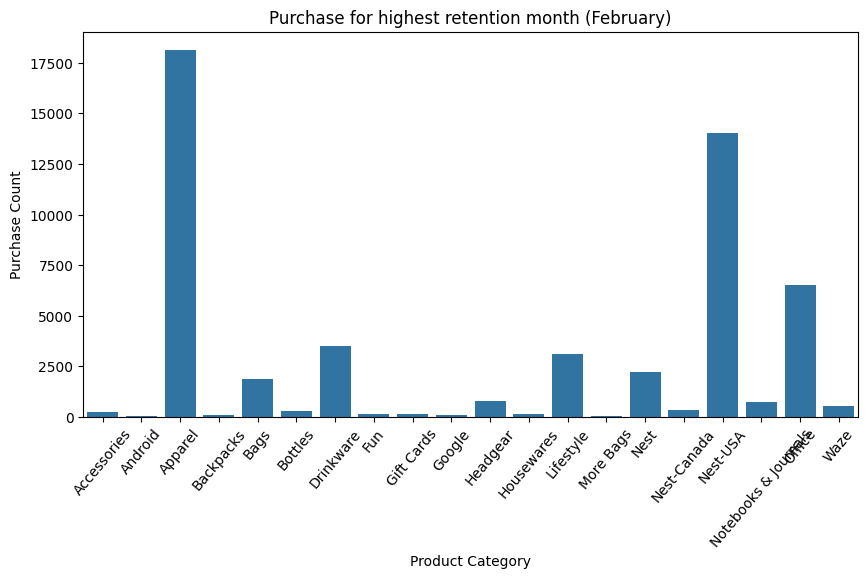

In [151]:
# Plot
plt.figure(figsize=[10, 5])
sns.barplot(data=product_analysis_high_retention_month.reset_index(), x='Product_Category', y='Purchase_Count')
plt.xlabel('Product Category')
plt.ylabel('Purchase Count')
plt.title('Purchase for highest retention month (February)')
plt.xticks(rotation = 50)
plt.show()

During higher retention month, Apparel, Nest_canada have higher purchase counts. Focus on these products to promote in other months.

In [152]:
# Coupon Analysis for high retention month
coupon_analysis_high_retention_month = df_acquisition_data.groupby('Coupon_Status').size()
coupon_analysis_high_retention_month.rename('Count', inplace=True)

,Count
Coupon_Status,
Clicked,26926
Not Used,8094
Used,17904


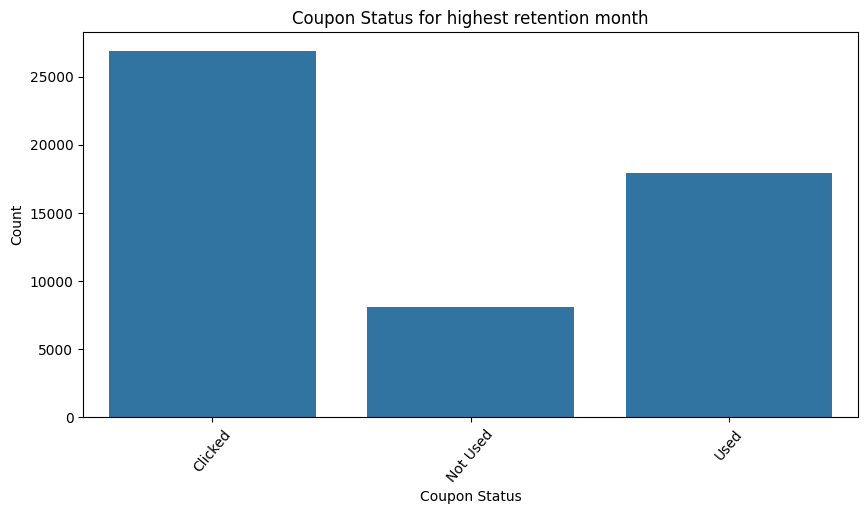

In [153]:
plt.figure(figsize=[10, 5])
sns.barplot(data=coupon_analysis_high_retention_month.reset_index(), x='Coupon_Status', y='Count')
plt.xlabel('Coupon Status')
plt.ylabel('Count')
plt.title('Coupon Status for highest retention month')
plt.xticks(rotation = 50)
plt.show()

During higher retention months, highest number of coupons were clicked and used. Run more targeted promotions or offer special discounts
 to encourage purchases.

Compare the revenue generated by new and existing customers month-over-month

In [154]:
# Calculate Revenue
df_acquisition_data['Revenue'] = df_acquisition_data['Quantity'] * df_acquisition_data['Avg_Price']
print(df_acquisition_data.head(5))

   CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  Month  Revenue  
0         1     153.71               6.5          Used      1   153.71  
1         1     15

In [155]:
# Determine New and Existing Customers
first_transaction_date = df_acquisition_data.groupby('CustomerID')['Transaction_Date'].transform('min')
# Define new customers by comparing the current date with first transaction date
df_acquisition_data['Is_New_Customer'] = df_acquisition_data['Transaction_Date'] == first_transaction_date
print(f"First transaction dates:\n {df_acquisition_data.head()}")

First transaction dates:
    CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  Month  Revenue  \
0         1     153.71               6.5          Used      1   

In [156]:
# Extract Revenue for all new/existing customers for each month
revenue_by_month = df_acquisition_data.groupby(['Month', 'Is_New_Customer'])['Revenue'].sum().unstack(fill_value=0)
revenue_by_month.columns = ['Existing_Customers_Revenue', 'New_Customers_Revenue']
print(f"Revenue per customer:\n {revenue_by_month}")

Revenue per customer:
        Existing_Customers_Revenue  New_Customers_Revenue
Month                                                   
1                        79880.12              323744.46
2                       110000.87              200818.93
3                       115014.33              234593.76
4                       229466.09              172152.33
5                       154686.26              153077.16
6                       148910.75              172170.63
7                       268801.52              103836.55
8                       233769.51              167440.86
9                       228544.33              132004.07
10                      235853.46              173827.82
11                      315819.46              193123.16
12                      336068.58              187189.61


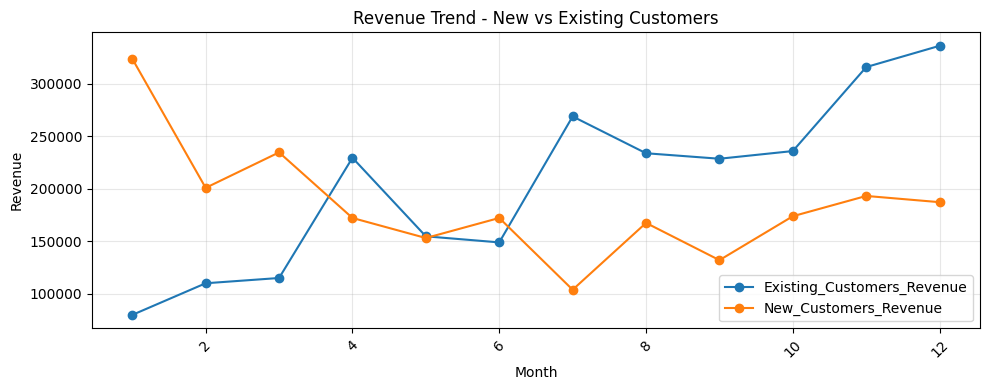

In [157]:
# Plot
revenue_by_month.plot(kind='line', figsize=(10, 4), marker='o')
plt.title('Revenue Trend - New vs Existing Customers')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

 Analyzing the plot, we know New_Customers_Revenue
 1. New_Customers_Revenue: drastically decreased over first two months and rose a little for 3rd and 7th month, but ultimately we can say
 that the revenue decreased over the year 2019. This suggests that fewer new customers are being acquired monthly, possibly because
 of issues in marketing or customer reach.
 2. Existing_Customers_Revenue: The graph shows that existing customer revenue increased over the last year, which suggests good
 retention efforts probably because of the quality of products or less/free delivery charges for existing customers or discounts

 Case 6 - Analyze the relationship between coupon usage and revenue generation

In [158]:
# Calculate total revenue for coupon users and non-users
coupon_revenue = df_acquisition_data.groupby('Coupon_Status')['Revenue'].sum().reset_index()
print(f"Coupon Revenue\n {coupon_revenue}")

Coupon Revenue
   Coupon_Status     Revenue
0       Clicked  2377266.65
1      Not Used   732709.87
2          Used  1560818.10


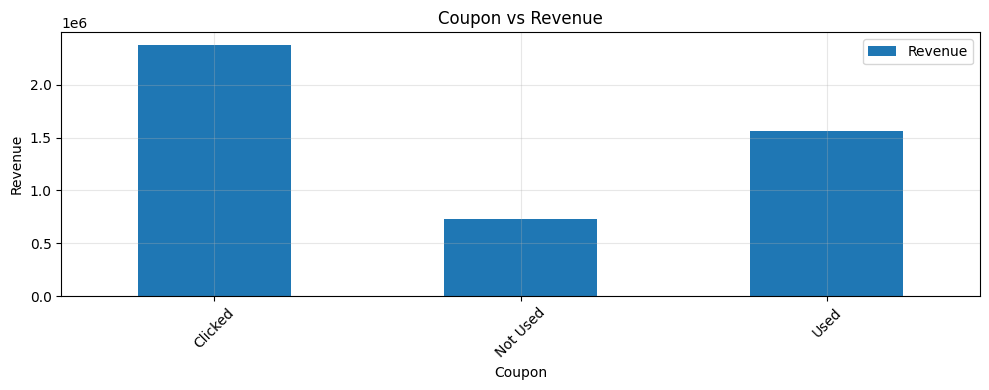

In [159]:
# Plot
coupon_revenue.plot(x='Coupon_Status', y='Revenue', kind='bar', figsize=(10, 4))
plt.title('Coupon vs Revenue')
plt.xlabel('Coupon')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Analyze how coupon usage affects revenue generation
 Coupon users revenue is significantly higher meaning coupons are effective in driving sales, potentially attracting customers.
 Discount strategies can be optimized to maximize revenue while maintaining profitability,
 
 Offering discounts only on selected categories with higher profit margins.
 Offering coupons only to first-time customers or introduce a countdown for coupon offering to limit time.

 Case 7 - Identify the top-performing products and analyze the factors driving their success

In [160]:
# Identify the products with highest revenue and select top 10 products
highest_revenue_products = df_acquisition_data.groupby('Product_SKU')['Revenue'].sum().sort_values(ascending=False).head(10)
# Identify the products with highest quantity sold
highest_quantity_products = df_acquisition_data.groupby('Product_SKU')['Quantity'].sum().sort_values(ascending=False).head(10)
# Identify the products with highest number of transactions
highest_purchased_products = df_acquisition_data.groupby('Product_SKU')['Transaction_ID'].count().sort_values(ascending=False).head(10)
# Combine all 3 into a single DataFrame
product_performance = pd.DataFrame({
    'Revenue': highest_revenue_products,
    'Quantity Sold': highest_quantity_products,
    'Transaction Count': highest_purchased_products
})

print("Product performance per SKU:\n", product_performance)


Product performance per SKU:
                   Revenue  Quantity Sold  Transaction Count
Product_SKU                                                
GGOEGBMJ013399        NaN         7321.0                NaN
GGOEGDHC018299        NaN         9728.0              583.0
GGOEGFKQ020399        NaN         5847.0              806.0
GGOEGFSR022099        NaN         5549.0                NaN
GGOEGFYQ016599        NaN         5098.0                NaN
GGOEGGOA017399        NaN        16234.0                NaN
GGOEGOAQ012899        NaN         4861.0                NaN
GGOEGOLC014299        NaN         6496.0                NaN
GGOENEBB078899  528612.93            NaN             3230.0
GGOENEBD084799   70604.48            NaN                NaN
GGOENEBJ079499  688916.34         4570.0             3511.0
GGOENEBQ078999  629977.12         5206.0             3328.0
GGOENEBQ079099  213819.16            NaN             1361.0
GGOENEBQ079199  212495.57            NaN             1065.0
GGOENEBQ08

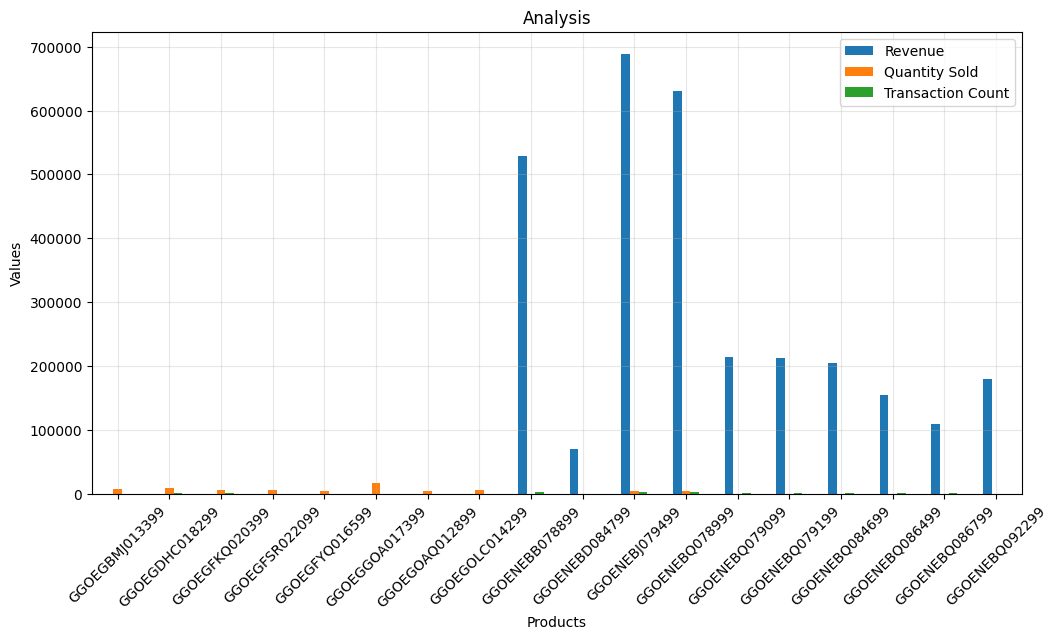

In [161]:
# Plot DataFrame
product_performance.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Products')
plt.ylabel('Values')
plt.title('Analysis')
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

 The above analysis shows top performing products based on highest revenue generated, highest number of products sold and highest
 number of transactions. We can use this data to analyze the factors influencing these conditions for thes top-performing products. These
 insights can inform if the manufacturing of the highest performing products should be increased and more promotional strategies can be
 implemented to further increase the sale. We can also check if certain category products are performing better than others or if offering
 coupons increased sales etc.

 Case 8 & 9 - Analyze the relationship between monthly marketing spend and revenue

In [162]:
df_Marketing_spend = pd.read_csv('/content/Marketing_Spend.csv')
# Convert object to Date
df_Marketing_spend['Transaction_Date'] = pd.to_datetime(df_Marketing_spend['Date'])
df_Marketing_spend['Month'] = df_Marketing_spend['Transaction_Date'].dt.month
print(f"Marketing Spend:\n {df_Marketing_spend.head()}")

Marketing Spend:
        Date  Offline_Spend  Online_Spend Transaction_Date  Month
0  1/1/2019           4500       2424.50       2019-01-01      1
1  1/2/2019           4500       3480.36       2019-01-02      1
2  1/3/2019           4500       1576.38       2019-01-03      1
3  1/4/2019           4500       2928.55       2019-01-04      1
4  1/5/2019           4500       4055.30       2019-01-05      1


In [163]:
# Calculate monthly marketing spend
monthly_marketing_spend = df_Marketing_spend.groupby('Month').agg({'Offline_Spend' : 'sum', 'Online_Spend' : 'sum'}).fillna(0)
# Monthly marketing spend
monthly_marketing_spend['Total_Marketing_Spend'] = monthly_marketing_spend['Offline_Spend'] + monthly_marketing_spend['Online_Spend']
print(f"\nTotal marketing spend:\n {monthly_marketing_spend.head()}")
# Monthly revenue
monthly_revenue = df_acquisition_data.groupby('Month')['Revenue'].sum().reset_index()
print(f"\nTotal revenue generated:\n {monthly_revenue.head()}")
#Merge both dataframes for analysis
df_new = monthly_marketing_spend.merge(monthly_revenue, on='Month', how='left')
print(f"\nMerged Data:\n {df_new.head()}")


Total marketing spend:
        Offline_Spend  Online_Spend  Total_Marketing_Spend
Month                                                    
1              96600      58328.95              154928.95
2              81300      55807.92              137107.92
3              73500      48750.09              122250.09
4              96000      61026.83              157026.83
5              65500      52759.64              118259.64

Total revenue generated:
    Month    Revenue
0      1  403624.58
1      2  310819.80
2      3  349608.09
3      4  401618.42
4      5  307763.42

Merged Data:
    Month  Offline_Spend  Online_Spend  Total_Marketing_Spend    Revenue
0      1          96600      58328.95              154928.95  403624.58
1      2          81300      55807.92              137107.92  310819.80
2      3          73500      48750.09              122250.09  349608.09
3      4          96000      61026.83              157026.83  401618.42
4      5          65500      52759.64          

<Figure size 1200x600 with 0 Axes>

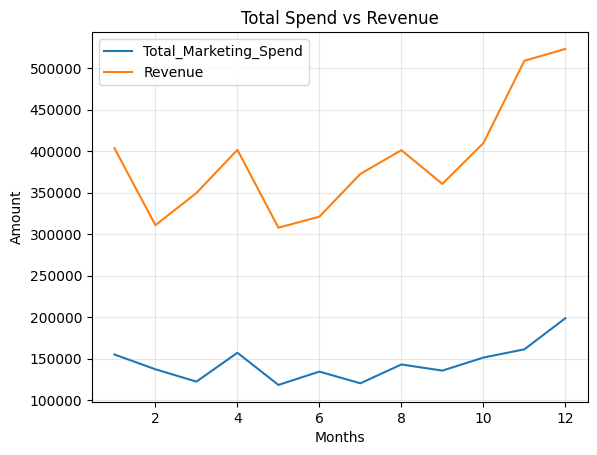

In [164]:
plt.figure(figsize=(12, 6))
df_new.reset_index().plot(x='Month', y=['Total_Marketing_Spend', 'Revenue'] , kind='line')
plt.xlabel('Months')
plt.ylabel('Amount')
plt.title('Total Spend vs Revenue')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

 From the above analysis, we can see that the revenue increased proportionally with Makerting Spend in the following months, 3rd, 7th, 9th
 and consistently after that indicating clearly that Revenue increased significantly with marketing spend. In months 2nd and 6th
 disproportionality can be seen where revenue decreased with increase in marketing spend.

In [165]:
df_new['Net_Profit'] = df_new['Revenue'] - df_new['Total_Marketing_Spend']
df_new['ROI'] = (df_new['Net_Profit']/df_new['Total_Marketing_Spend']) * 100
mean_ROI = df_new['ROI'].mean()
print(f"Mean ROI:\n {mean_ROI}")

Mean ROI:
 169.5983662979681


<Figure size 1200x600 with 0 Axes>

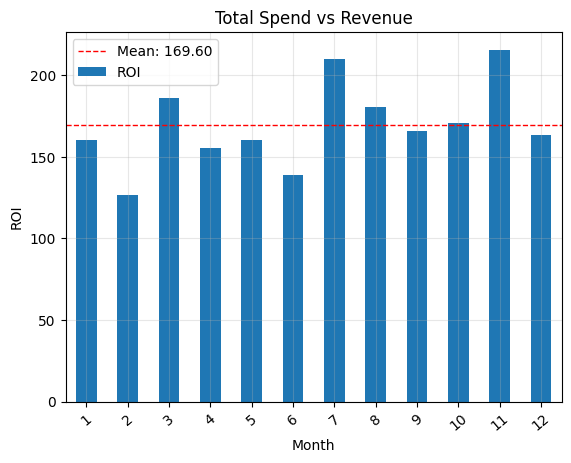

In [166]:
plt.figure(figsize=(12, 6))
df_new.reset_index().plot(x='Month', y='ROI' , kind='bar')
plt.axhline(mean_ROI, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_ROI:.2f}') # Plot the mean as a horizontal line
plt.xlabel('Month')
plt.ylabel('ROI')
plt.title('Total Spend vs Revenue')
plt.legend()
plt.xticks(rotation=40)
plt.grid(alpha=0.3)
plt.show()

Analyze marketing strategies for the months giving higher than average ($169.60) ROI like 3rd, 7th and 11th. Note what increased the ROI on
 these months and implement strategies accordingly, seasonal products sell might be one the reasons or discounts offered might be more
 which increased the sales significantly higher and hence the ROI.
 We can analyze it by looking for months where the ROI is lower than average ($169.60) or where high spending did not proportionately
 increase revenue.
 Opportunities to reallocate resources for better results
 We can also compare Offline Spend and Online Spend to get clarity over which channel consistently performs better and plan the promotion
 strategy accordingly.
 Evaluate effectiveness of marketing campaigns by comparing marketing spend to revenue generated

<Figure size 1200x600 with 0 Axes>

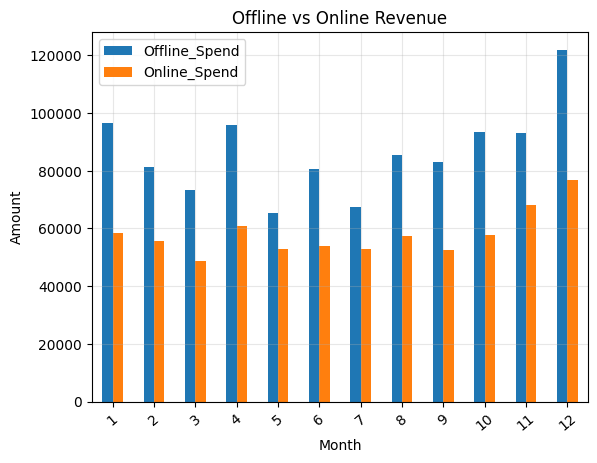

In [167]:
# Plot Offline vs Online spedn to analyze group-wise revenue generated
plt.figure(figsize=(12, 6))
df_new.reset_index().plot(x='Month', y=['Offline_Spend', 'Online_Spend'] , kind='bar')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Offline vs Online Revenue')
plt.legend()
plt.xticks(rotation=40)
plt.grid(alpha=0.3)
plt.show()

 Case 10 - Segment customers into groups such as Premium, Gold, Silver, and Standard using RFM Technique

In [168]:
# Copy original data to a new dataframe
df_rfm_data = df_Online_Sales.copy()
df_rfm_data['Transaction_Date'] = pd.to_datetime(df_rfm_data['Transaction_Date'])
print(df_rfm_data.head(5))

   CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  
0         1     153.71               6.5          Used  
1         1     153.71               6.5          

Recency (R):

In [169]:
# Find the most recent transaction date
most_recent_date = df_rfm_data['Transaction_Date'].max()
df_recent_transactions = df_rfm_data.groupby('CustomerID')['Transaction_Date'].max().reset_index().fillna(0)
# Calculate Recency
df_recent_transactions['Recency'] = (most_recent_date - df_recent_transactions['Transaction_Date']).dt.days
# Define recency bins
recency_bins = [-1, 100, 200, 300, 400, 500]
recency_labels = [5, 4, 3, 2, 1]
# Calculate Recency Score
df_recent_transactions['Recency_Score'] = pd.cut(df_recent_transactions['Recency'], bins=recency_bins, labels=recency_labels)
print(f"Recency_Score:\n {df_recent_transactions.head()}")

Recency_Score:
    CustomerID Transaction_Date  Recency Recency_Score
0       12346       2019-09-15      107             4
1       12347       2019-11-02       59             5
2       12348       2019-10-19       73             5
3       12350       2019-12-14       17             5
4       12356       2019-09-15      107             4


Frequency (F):

In [170]:
# Calculate Frequency Score
df_frequent_transactions = df_rfm_data.groupby('CustomerID')['Transaction_ID'].count().reset_index().fillna(0)
df_frequent_transactions.rename(columns={'Transaction_ID': 'Frequency'}, inplace=True)
# Create frequency bin labels
frequency_bins = [0, 100, 200, 300, 400, df_frequent_transactions['Frequency'].max()]
frequency_labels = [1, 2, 3, 4, 5]
df_frequent_transactions['Frequency_Score'] = pd.cut(df_frequent_transactions['Frequency'], bins=frequency_bins, labels=frequency_labels)
print(f"Frequency_Score:\n {df_frequent_transactions.head()}")

Frequency_Score:
    CustomerID  Frequency Frequency_Score
0       12346          2               1
1       12347         60               1
2       12348         23               1
3       12350         17               1
4       12356         36               1


Monetary (M):

In [171]:
# Calculate Monetary Score
df_rfm_data['Total_Spent'] = df_rfm_data['Avg_Price'] * df_rfm_data['Quantity']
df_total_amount_spend = df_rfm_data.groupby('CustomerID')['Total_Spent'].sum().reset_index().fillna(0)
df_total_amount_spend.rename(columns={'Total_Spent' : 'Monetary'}, inplace=True)
# Create monetary bin labels
monetary_bins = [0, 10000, 20000, 30000, 40000, df_total_amount_spend['Monetary'].max()]
monetary_labels = [1, 2, 3, 4, 5]
df_total_amount_spend['Monetary_Score'] = pd.cut(df_total_amount_spend['Monetary'], bins=monetary_bins, labels=monetary_labels)
print(f"Monetary_Score:\n {df_total_amount_spend.head()}")

Monetary_Score:
    CustomerID  Monetary Monetary_Score
0       12346     30.99              1
1       12347  13834.90              2
2       12348   1442.12              1
3       12350   1360.07              1
4       12356   1442.47              1


RFM Score

In [172]:
# Merge all 3 dataframes to the main df
df_rfm = df_recent_transactions.merge(
    df_frequent_transactions, on='CustomerID', how='outer'
).merge(
    df_total_amount_spend, on='CustomerID', how='outer'
)

# Add all scores for each customer to calculate final RFM Score
df_rfm['RFM_Score'] = (
    df_rfm['Recency_Score'].astype(int) +
    df_rfm['Frequency_Score'].astype(int) +
    df_rfm['Monetary_Score'].astype(int)
)

print(f"Max RFM Score: {df_rfm['RFM_Score'].max()} \nMin RFM Score: {df_rfm['RFM_Score'].min()}")


Max RFM Score: 15 
Min RFM Score: 4


In [173]:
def segment_customers(rfm_score):
  if 0 <= rfm_score < 5:
    print(f"Standard Customer with RF Score {rfm_score}")
  elif 5 <= rfm_score < 8:
    print(f"Silver Customer with RF Score {rfm_score}")
  elif 8 <= rfm_score < 12:
    print(f"Gold Customer with RF Score {rfm_score}")
  else:
    print(f"Premium Customer with RF Score {rfm_score}")
result = df_rfm['RFM_Score'].apply(segment_customers)

Silver Customer with RF Score 6
Gold Customer with RF Score 8
Silver Customer with RF Score 7
Silver Customer with RF Score 7
Silver Customer with RF Score 6
Silver Customer with RF Score 6
Silver Customer with RF Score 6
Silver Customer with RF Score 7
Silver Customer with RF Score 7
Silver Customer with RF Score 7
Silver Customer with RF Score 6
Silver Customer with RF Score 6
Silver Customer with RF Score 6
Silver Customer with RF Score 6
Silver Customer with RF Score 7
Silver Customer with RF Score 7
Silver Customer with RF Score 6
Silver Customer with RF Score 7
Silver Customer with RF Score 6
Silver Customer with RF Score 7
Silver Customer with RF Score 7
Silver Customer with RF Score 6
Silver Customer with RF Score 6
Silver Customer with RF Score 6
Silver Customer with RF Score 5
Silver Customer with RF Score 7
Silver Customer with RF Score 7
Silver Customer with RF Score 5
Silver Customer with RF Score 7
Silver Customer with RF Score 5
Silver Customer with RF Score 7
Silver Cus

 Targeted strategies for each segment can be,

 #Premium:
 1. Provide more discounts to Premium customers or exclusive offers.
 2. Personalized communication
 #Gold:
 1. Target selling related products
 #Silver:
 1. Send personalized recommendations
 #Standard:
 1. Campaigns or offers to make them Gold or Premium customers

Case 11 - Analyze the revenue contribution of each customer segment

In [174]:
# Calculate revenue
df_rfm_data['Revenue'] = df_rfm_data['Avg_Price'] * df_rfm_data['Quantity']
# Merge RFM data to the main dataset
df_rfm_data = df_rfm_data.merge(df_rfm[['CustomerID', 'RFM_Score']], on='CustomerID', how='left')
# Calculate revenue for each RFM Score segment
df_revenue_by_segment = df_rfm_data.groupby('RFM_Score')['Revenue'].sum().reset_index()
print(f"Revenue per customer segment:\n {df_revenue_by_segment}")

Revenue per customer segment:
     RFM_Score     Revenue
0           4   266253.22
1           5   509856.96
2           6   803937.68
3           7  1691076.06
4           8   264994.20
5           9   609065.97
6          10    70378.75
7          11    62923.56
8          12    89445.37
9          14    74601.36
10         15   228261.49


<Figure size 1200x600 with 0 Axes>

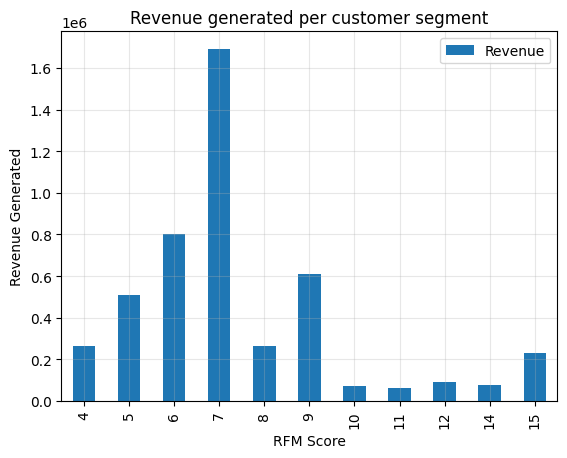

In [175]:
# Plot
plt.figure(figsize=(12, 6))
df_revenue_by_segment.reset_index().plot(x='RFM_Score', y='Revenue' , kind='bar')
plt.xlabel('RFM Score')
plt.ylabel('Revenue Generated')
plt.title('Revenue generated per customer segment')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

 Revenue generated by Silver customer segment is much more than any other segment.

 Case 12 - Group customers by their month of first purchase and analyze retention rates over time.

In [176]:
# Copy the original dataset
df_customer_cohort = df_Online_Sales.copy()
print(df_customer_cohort.head())

   CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  
0         1     153.71               6.5          Used  
1         1     153.71               6.5          

In [177]:
# First transaction month for each customer
df_customer_cohort['First_Purchase_Month'] = df_customer_cohort.groupby('CustomerID')['Transaction_Date'].transform('min').dt.month
df_customer_cohort.groupby('First_Purchase_Month')['CustomerID'].count()
# Transaction Month for each  customer
df_customer_cohort['Transaction_Month'] = df_customer_cohort['Transaction_Date'].dt.month
cohort_data = df_customer_cohort.groupby(['First_Purchase_Month', 'Transaction_Month']).agg({'CustomerID' : 'nunique'}).reset_index()
cohort_data.rename(columns={'CustomerID' : 'Customer_Count'}, inplace=True)
# Pivot the data to get a cohort matrix
cohort_pivot = cohort_data.pivot(index='First_Purchase_Month', columns='Transaction_Month', values='Customer_Count').fillna(0)
print(f"\nCustomer Cohort Data:\n {cohort_pivot.head()}")


Customer Cohort Data:
 Transaction_Month        1     2      3      4      5     6     7     8   \
First_Purchase_Month                                                       
1                     215.0  13.0   24.0   34.0   23.0  44.0  35.0  47.0   
2                       0.0  96.0    7.0    9.0   16.0  17.0  22.0  19.0   
3                       0.0   0.0  177.0   18.0   35.0  25.0  32.0  33.0   
4                       0.0   0.0    0.0  163.0   14.0  24.0  24.0  18.0   
5                       0.0   0.0    0.0    0.0  112.0  12.0   9.0  13.0   

Transaction_Month       9     10    11    12  
First_Purchase_Month                          
1                     23.0  28.0  20.0  34.0  
2                     15.0  12.0  11.0  16.0  
3                     22.0  22.0  15.0  19.0  
4                     15.0  10.0  16.0  12.0  
5                     10.0  13.0  14.0   8.0  


 Case 13 - Analyze the lifetime value of customers acquired in different months.

In [178]:
df_customers = df_Online_Sales.copy()
df_customers['Revenue'] = df_customers['Avg_Price'] * df_customers['Quantity']
# Calculate acquired month for each customer
acquisition_month = df_customers.groupby('CustomerID')['Transaction_Date'].min().dt.month.reset_index()
acquisition_month.rename(columns={'Transaction_Date' : 'Acquisition_Month'}, inplace=True)
# Merge data
df_customers = df_customers.merge(acquisition_month, on='CustomerID', how='left')
print(f"LTV Customer Data:\n {df_customers.head()}")
# Group customers based on month
df_customer_ltv_acquisition_by_month = df_customers.groupby(['Acquisition_Month', 'CustomerID'])['Revenue'].sum().reset_index()
# Calculate monthly revenue for each acquired customer
df_customer_total_ltv = df_customer_ltv_acquisition_by_month.groupby(['CustomerID', 'Acquisition_Month'])['Revenue'].sum().reset_index()
print(f"\nTotal LTV by Acquisition Month:\n {df_customer_total_ltv.rename(columns={'Revenue' : 'Total_LTV'})}")

LTV Customer Data:
    CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  Revenue  \
0         1     153.71               6.5          Used   153.71   
1         

 From Acquired Months, we see the revenue is mostly higher which might be helpful in analyzing why those months performed better.
 Strategy would be to increase marketing spend and offer more promotions to lure more customers in those months. Might be showing higher
 LTV because of holiday or festive season, so plan acquisition strategies accordingly. For Retention months, LTV of customers is consistent
 which shows they are more valuable. Strategy: targeted campaigns or personalized offers to these customers.

Case -	Do customers who use coupons have a different average transaction value compared to those who do not

In [179]:
# Copy original data
df_customers_data = df_Online_Sales.copy()
df_customers_data['Transaction_Value'] = df_customers_data['Avg_Price'] * df_customers_data['Quantity']
print(df_customers_data.head())

   CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  Transaction_Value  
0         1     153.71               6.5          Used             153.71  
1         1 

In [180]:
# Calculate the total transaction value per customer who used a coupon
total_transaction_for_customers_who_used_coupons = (
    df_customers_data[df_customers_data['Coupon_Status'] == 'Used']
    .groupby('CustomerID')['Transaction_Value']
    .sum()
    .reset_index()
)

total_transaction_for_customers_who_used_coupons.rename(
    columns={'Transaction_Value': 'Total_Transaction_Value'}, inplace=True
)


# Calculate the total transaction value per customer who did not use a coupon
total_transaction_for_customers_who_did_not_use_coupons = (
    df_customers_data[df_customers_data['Coupon_Status'] == 'Not Used']
    .groupby('CustomerID')['Transaction_Value']
    .sum()
    .reset_index()
)

total_transaction_for_customers_who_did_not_use_coupons.rename(
    columns={'Transaction_Value': 'Total_Transaction_Value'}, inplace=True
)


# Print results
print("Customer transactions who used coupons:\n",
      total_transaction_for_customers_who_used_coupons)

print("\nCustomer transactions who did not use coupons:\n",
      total_transaction_for_customers_who_did_not_use_coupons)


# Means
mean_for_customers_who_used_coupons = \
    total_transaction_for_customers_who_used_coupons['Total_Transaction_Value'].mean().round(2)

mean_for_customers_who_did_not_use_coupons = \
    total_transaction_for_customers_who_did_not_use_coupons['Total_Transaction_Value'].mean().round(2)

print(f"\nMean transactions for customers who used coupons: {mean_for_customers_who_used_coupons}")
print(f"Mean transactions for customers who did not use coupons: {mean_for_customers_who_did_not_use_coupons}")

Customer transactions who used coupons:
       CustomerID  Total_Transaction_Value
0          12346                    30.99
1          12347                  3074.80
2          12348                   705.45
3          12350                   507.39
4          12356                   689.16
...          ...                      ...
1369       18250                  1325.48
1370       18259                   111.90
1371       18260                   980.96
1372       18269                    35.63
1373       18283                  2837.54

[1374 rows x 2 columns]

Customer transactions who did not use coupons:
       CustomerID  Total_Transaction_Value
0          12347                  5072.96
1          12348                    12.99
2          12350                   339.62
3          12356                   322.02
4          12359                   134.64
...          ...                      ...
1237       18259                    10.39
1238       18260                    38.28
123

 T Test Hypothesis Testing
 Null Hypothesis: Mean transaction for customers who used coupons is same as mean transaction of customers who did not use
 coupons.
 Alternate Hypothesis: Mean transaction for customers who used coupons is different than mean transaction of customers who did not
 use coupons

In [181]:
# Perform T-Test
t_statistics = stats.ttest_ind(
    total_transaction_for_customers_who_used_coupons['Total_Transaction_Value'],
    total_transaction_for_customers_who_did_not_use_coupons['Total_Transaction_Value'],
    equal_var=False
)

print(f"T-statistic: {t_statistics.statistic.round(2)}, P-value: {t_statistics.pvalue.round(4)}")

T-statistic: 9.77, P-value: 0.0


 Since P-value is less than 0.05, we can reject the Null Hypothesis and can conclude that the mean transaction for customers who used
 coupons is significantly different than mean transaction of customers who did not use coupons.
 The calculated mean above for both groups shows that the company's discount and coupon strategies are working well to lure more
 customers to purchase the products

 Case 15
 Calculate Purchase behaviors:
 Order Frequency
 Order Value

In [182]:
# Copy original data
df_customer_data = df_Online_Sales.copy()
df_customer_data['Revenue'] = df_customer_data['Avg_Price'] * df_customer_data['Quantity']
print(f"Customer Data with Revenue:\n {df_customer_data.head()}")

Customer Data with Revenue:
    CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  Revenue  
0         1     153.71               6.5          Used   153.71  
1  

In [183]:
# Calculate number of transactions per customer
transactions_per_customer = df_customer_data.groupby('CustomerID')['Transaction_ID'].count().reset_index()
transactions_per_customer.rename(columns={'Transaction_ID' : 'Order_Frequency'}, inplace=True)
print(f"Number of transactions per customer:\n {transactions_per_customer.head()}")
# Calculate total transaction value per customer
total_transaction_value_per_customer = df_customer_data.groupby('CustomerID')['Revenue'].sum().reset_index()
total_transaction_value_per_customer.rename(columns={'Revenue' : 'Order_Value'}, inplace=True)
print(f"\nTransaction value per customer:\n {total_transaction_value_per_customer.head()}")
# Calculate delivery charges per customer
delivery_charges_per_customer = df_customer_data.groupby('CustomerID')['Delivery_Charges'].sum().reset_index()
print(f"\nDelivery Charges per customer:\n {delivery_charges_per_customer.head()}")
# Merge all 3 dataframes to a single dataframe
df_customer_purchase_behaviour = (
    transactions_per_customer
    .merge(total_transaction_value_per_customer, on='CustomerID', how='left')
    .merge(delivery_charges_per_customer, on='CustomerID', how='left')
)

print("\nCustomer Purchase Behaviour based on certain factors:\n", df_customer_purchase_behaviour)

Number of transactions per customer:
    CustomerID  Order_Frequency
0       12346                2
1       12347               60
2       12348               23
3       12350               17
4       12356               36

Transaction value per customer:
    CustomerID  Order_Value
0       12346        30.99
1       12347     13834.90
2       12348      1442.12
3       12350      1360.07
4       12356      1442.47

Delivery Charges per customer:
    CustomerID  Delivery_Charges
0       12346            150.00
1       12347            665.14
2       12348            197.15
3       12350            127.88
4       12356            637.49

Customer Purchase Behaviour based on certain factors:
       CustomerID  Order_Frequency  Order_Value  Delivery_Charges
0          12346                2        30.99            150.00
1          12347               60     13834.90            665.14
2          12348               23      1442.12            197.15
3          12350               17      

In [184]:
# Read customer demographics data
df_customer_demographics = pd.read_excel('/content/CustomersData.xlsx')
print(f"Customer Demographics:\n {df_customer_demographics.head()}")

Customer Demographics:
    CustomerID Gender    Location  Tenure_Months
0       17850      M     Chicago             12
1       13047      M  California             43
2       12583      M     Chicago             33
3       13748      F  California             30
4       15100      M  California             49


In [185]:
# Merge sales data and customer demographics on customer ID
df_customers_data_merged = df_customer_purchase_behaviour.merge(df_customer_demographics, on='CustomerID', how='left')
print(f"\nSales data with customer demographics:\n {df_customers_data_merged.head()}")


Sales data with customer demographics:
    CustomerID  Order_Frequency  Order_Value  Delivery_Charges Gender  \
0       12346                2        30.99            150.00      F   
1       12347               60     13834.90            665.14      M   
2       12348               23      1442.12            197.15      M   
3       12350               17      1360.07            127.88      M   
4       12356               36      1442.47            637.49      F   

     Location  Tenure_Months  
0    New York             31  
1    New York             20  
2  California             39  
3  California             25  
4     Chicago             31  


In [186]:
# Calculate average for Order_Frequency, Order_Value and Delivery_Charges across each group such as Gender and Location

# -------------------------------
# Gender based means
# -------------------------------
gender_based_order_frequency_mean = df_customers_data_merged.groupby('Gender')['Order_Frequency'].mean().reset_index()
gender_based_order_value_mean = df_customers_data_merged.groupby('Gender')['Order_Value'].mean().reset_index()
gender_based_delivery_charges_mean = df_customers_data_merged.groupby('Gender')['Delivery_Charges'].mean().reset_index()

# Combine all 3 for visualization
df_gender_based_averages = (
    gender_based_order_frequency_mean
    .merge(gender_based_order_value_mean, on='Gender')
    .merge(gender_based_delivery_charges_mean, on='Gender')
)

print("Gender based averages:\n", df_gender_based_averages)


# -------------------------------
# Location based means
# -------------------------------
location_based_order_frequency_mean = df_customers_data_merged.groupby('Location')['Order_Frequency'].mean().reset_index()
location_based_order_value_mean = df_customers_data_merged.groupby('Location')['Order_Value'].mean().reset_index()
location_based_delivery_charges_mean = df_customers_data_merged.groupby('Location')['Delivery_Charges'].mean().reset_index()

# Combine all 3 for visualization
df_location_based_averages = (
    location_based_order_frequency_mean
    .merge(location_based_order_value_mean, on='Location')
    .merge(location_based_delivery_charges_mean, on='Location')
)

print("\nLocation based averages:\n", df_location_based_averages)


Gender based averages:
   Gender  Order_Frequency  Order_Value  Delivery_Charges
0      F        35.339400  3108.854636        374.572248
1      M        37.297753  3309.221704        387.237060

Location based averages:
         Location  Order_Frequency  Order_Value  Delivery_Charges
0     California        34.775862  3108.722651        372.737241
1        Chicago        40.307018  3565.538553        423.522434
2     New Jersey        30.221477  2749.442013        286.988121
3       New York        34.484568  2892.045154        368.940432
4  Washington DC        36.426667  3410.296533        376.811067


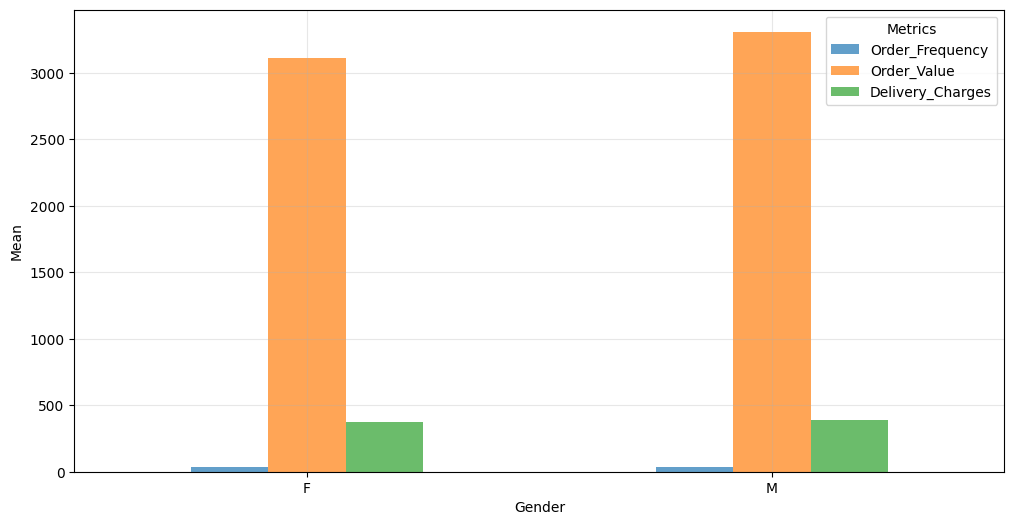

In [187]:
# Visualize the means
df_gender_based_averages.plot(x='Gender', kind='bar', figsize=(12,6), alpha=0.7)
plt.xlabel("Gender")
plt.ylabel("Mean")
plt.grid(alpha=0.3)
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.show()

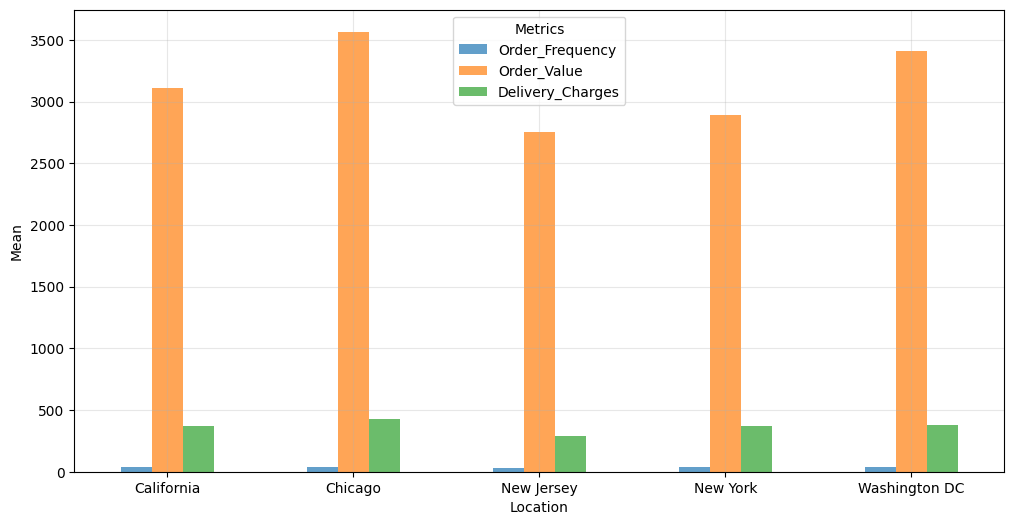

In [188]:
# Visualize the means
df_location_based_averages.plot(x='Location', kind='bar', figsize=(12,6), alpha=0.7)
plt.xlabel("Location")
plt.ylabel("Mean")
plt.grid(alpha=0.3)
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.show()

 Hypothesis Testing - ANOVA (One-way)
 Locations:
 Null Hypothesis (H0): There is no significant difference in purchase behavior across different locations.
 Alternative Hypothesis (H1): There is a significant difference in purchase behavior across different locations.
 Gender:
 Null Hypothesis (H0): There is no significant difference in purchase behavior across different genders.
 Alternative Hypothesis (H1): There is a significant difference in purchase behavior across different genders.

In [189]:
# Perform independent T-Test for Gender
t_test_gender_order_frequency = stats.ttest_ind(
df_customers_data_merged[df_customers_data_merged['Gender'] == 'M']['Order_Frequency'],
df_customers_data_merged[df_customers_data_merged['Gender'] == 'F']['Order_Frequency']
)
t_test_gender_order_value = stats.ttest_ind(
df_customers_data_merged[df_customers_data_merged['Gender'] == 'M']['Order_Value'],
df_customers_data_merged[df_customers_data_merged['Gender'] == 'F']['Order_Value']
)
t_test_gender_delivery_charges = stats.ttest_ind(
df_customers_data_merged[df_customers_data_merged['Gender'] == 'M']['Delivery_Charges'],
df_customers_data_merged[df_customers_data_merged['Gender'] == 'F']['Delivery_Charges']
)
print('T-test Gender - Order Frequency:', t_test_gender_order_frequency.pvalue.round(2))
print('T-test Gender - Order Value:', t_test_gender_order_value.pvalue.round(2))
print('T-test Gender - Delivery Charges:', t_test_gender_delivery_charges.pvalue.round(2))

T-test Gender - Order Frequency: 0.48
T-test Gender - Order Value: 0.47
T-test Gender - Delivery Charges: 0.72


 The statistics shows that for Gender, P-value is significantly > 0.05, there is not enough evidence to reject the Null Hypothesis meaning
 purchasing behavior is not biased towards any specific gender. #TODO: Location

Case 16 - Impact of customer tenure on purchase frequency?

In [190]:
df_customer_tenure = pd.read_excel('/content/CustomersData.xlsx')
df_sales_data = df_Online_Sales.copy()
print(f"Customer Data:\n {df_customer_tenure.head()}")
print(f"\nSales Data:\n {df_sales_data.head()}")

Customer Data:
    CustomerID Gender    Location  Tenure_Months
0       17850      M     Chicago             12
1       13047      M  California             43
2       12583      M     Chicago             33
3       13748      F  California             30
4       15100      M  California             49

Sales Data:
    CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Off

In [191]:
transaction_count = df_sales_data.groupby('CustomerID')['Transaction_ID'].count().reset_index()
transaction_count.rename(columns={'Transaction_ID' : 'Order_Frequency'}, inplace=True)
print(f"Transaction count:\n {transaction_count.head()}")

Transaction count:
    CustomerID  Order_Frequency
0       12346                2
1       12347               60
2       12348               23
3       12350               17
4       12356               36


In [192]:
df_merged = transaction_count.merge(df_customer_tenure, on='CustomerID', how='left')
print(f"Customer Tenure and Order Frequency:\n{df_merged.head()}")

Customer Tenure and Order Frequency:
   CustomerID  Order_Frequency Gender    Location  Tenure_Months
0       12346                2      F    New York             31
1       12347               60      M    New York             20
2       12348               23      M  California             39
3       12350               17      M  California             25
4       12356               36      F     Chicago             31


In [193]:
tenure_bins = [0, 15, 30, df_merged['Tenure_Months'].max()]
tenure_labels = ['Short Term', 'Mid Term', 'Long Term']
df_merged['Tenure'] = pd.cut(df_merged['Tenure_Months'], bins=tenure_bins, labels=tenure_labels)
print(f"Tenure:\n {df_merged.head()}")

Tenure:
    CustomerID  Order_Frequency Gender    Location  Tenure_Months     Tenure
0       12346                2      F    New York             31  Long Term
1       12347               60      M    New York             20   Mid Term
2       12348               23      M  California             39  Long Term
3       12350               17      M  California             25   Mid Term
4       12356               36      F     Chicago             31  Long Term


In [194]:
grouped_tenure = df_merged.groupby('Tenure')['Order_Frequency']
short_term = grouped_tenure.get_group('Short Term')
mid_term = grouped_tenure.get_group('Mid Term')
long_term = grouped_tenure.get_group('Long Term')

/tmp/ipython-input-2216455237.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_tenure = df_merged.groupby('Tenure')['Order_Frequency']


 Calculate one-way ANOVA test since order frequency is categorical data:
 NULL Hypothesis: Order frequencies are same for all tenure groups
 ALternate Hypothesis: Order frequencies are different for all tenure groups

In [195]:
# Perform ANOVA test for 3 categorical samples
anova_statistics = stats.f_oneway(short_term, mid_term, long_term)
print(f"ANOVA Statistics:\n {anova_statistics}")

ANOVA Statistics:
 F_onewayResult(statistic=np.float64(0.6527100095127931), pvalue=np.float64(0.5207842781404597))


 Since P-value 0.52 > 0.05, we fail to reject the Null Hypothesis meaning order frequencies for each tenure group is not different. We should
 focus on other segments like product value, purchase, demographics etc. and not on tenure

Case 17 - Analyze the relationship between delivery charges and order behavior.

In [196]:
df_sales_data = df_Online_Sales.copy()
df_sales_data['Revenue'] = df_sales_data['Avg_Price'] * df_sales_data['Quantity']
print(f"Sales Data:\n {df_sales_data.head()}")

Sales Data:
    CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  Revenue  
0         1     153.71               6.5          Used   153.71  
1         1     153

In [197]:
aggregated_order_count_delivery_charges = df_sales_data.groupby(['CustomerID', 'Transaction_ID']).agg(
Delivery_Charges = ('Delivery_Charges', 'sum'),
Order_Count = ('Quantity', 'sum')
).reset_index()
aggregated_order_count_delivery_charges.head()

,CustomerID,Transaction_ID,Delivery_Charges,Order_Count
0,12346,38223,150.00,3
1,12347,23979,28.82,2
2,12347,23980,13.00,6
3,12347,23981,248.65,23
4,12347,23984,32.50,217


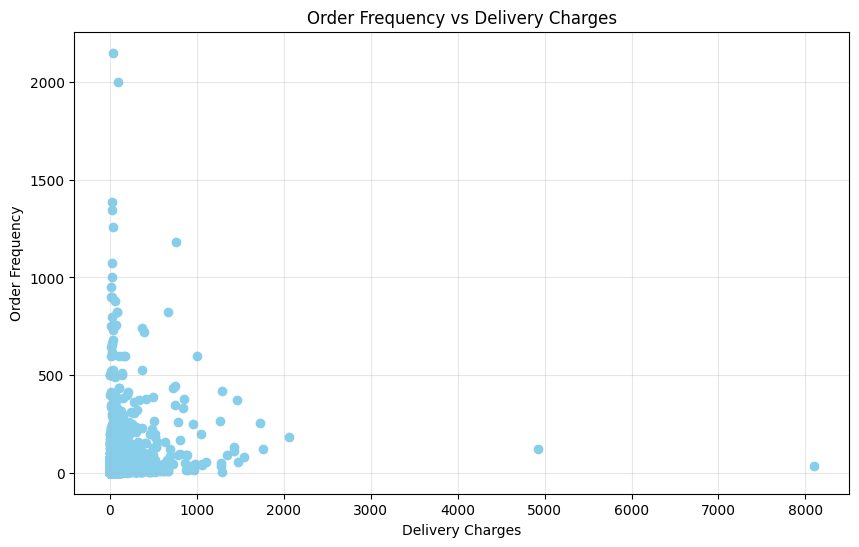

In [198]:
plt.figure(figsize=(10, 6))

plt.scatter(
    aggregated_order_count_delivery_charges['Delivery_Charges'],
    aggregated_order_count_delivery_charges['Order_Count'],
    color='skyblue'
)

plt.title('Order Frequency vs Delivery Charges')
plt.xlabel('Delivery Charges')
plt.ylabel('Order Frequency')
plt.grid(alpha=0.3)
plt.show()


 Most of the datapoints are clustered from order quantities (0 to 2000) and delivery charges (0 to 500). Since most high-frequency customers
 have low delivery charges, offer delivery discounts to encourage more orders from these customers. We can also set a minimum purchase
 amount and offer free delivery purchases above this threshold. There are few outliers where orders are low but delivery charges are high.
 might be an international order etc.

In [199]:
aggregated_revenue_delivery_charges = df_sales_data.groupby(['CustomerID', 'Transaction_ID']).agg(
Delivery_Charges = ('Delivery_Charges', 'sum'),
Total_Revenue = ('Revenue', 'sum')
).reset_index()
print(f"Delivery Charges vs Total Revenue:\n {aggregated_revenue_delivery_charges}")

Delivery Charges vs Total Revenue:
        CustomerID  Transaction_ID  Delivery_Charges  Total_Revenue
0           12346           38223            150.00          30.99
1           12347           23979             28.82          12.98
2           12347           23980             13.00         544.00
3           12347           23981            248.65         104.87
4           12347           23984             32.50        8677.83
...           ...             ...               ...            ...
26626       18283           40286              6.00          99.00
26627       18283           40288             18.00          35.88
26628       18283           40289             13.00          23.98
26629       18283           40290             12.00          48.98
26630       18283           40291             52.86           9.36

[26631 rows x 4 columns]


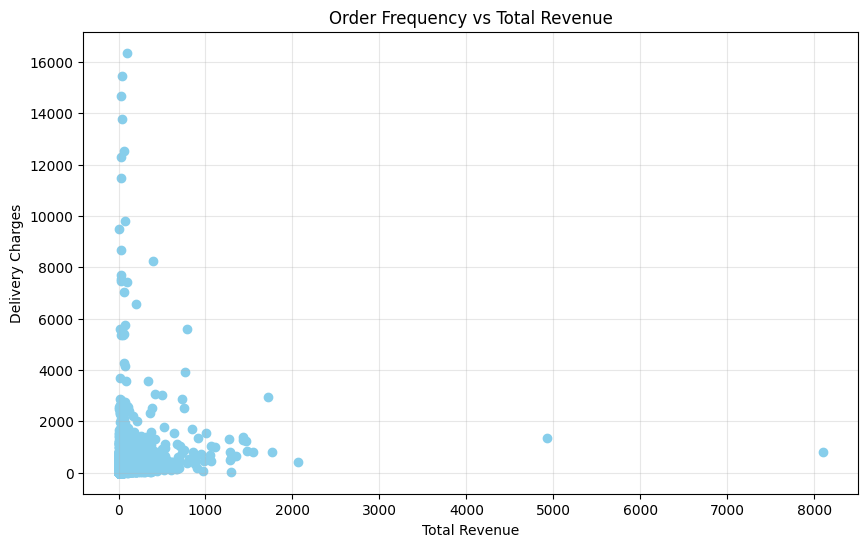

In [200]:
# Scatter plot: Order Value vs Delivery Charges
plt.figure(figsize=(10, 6))
plt.scatter(aggregated_revenue_delivery_charges['Delivery_Charges'], aggregated_revenue_delivery_charges['Total_Revenue'], color='skyblue')
plt.title('Order Frequency vs Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Delivery Charges')
plt.grid(alpha=0.3)
plt.show()

Case 18 - Evaluate how taxes and delivery charges influence customer spending behavior

In [201]:
# Import tax data
df_tax_data = pd.read_excel('/content/Tax_amount.xlsx')
print(f"Tax on Products:\n {df_tax_data.head()}")

Tax on Products:
   Product_Category   GST
0         Nest-USA  0.10
1           Office  0.10
2          Apparel  0.18
3             Bags  0.18
4        Drinkware  0.18


In [202]:
# Merge datasets on Product Category to calculate tax per category
df_merged = df_sales_data.merge(df_tax_data, on='Product_Category', how='left').fillna(0)
# Calculate tax amount
df_merged['Tax_Amount'] = df_merged['Revenue'] * df_merged['GST']
# Aggregate tax amount per product category
aggregated_tax_and_delivery_data_per_customer = df_merged.groupby('CustomerID').agg(
  Tax_Amount = ('Tax_Amount', 'sum'),
  Delivery_Charges = ('Delivery_Charges', 'sum'),
  Revenue = ('Revenue', 'sum')
).reset_index()
print(f"Tax and Delivery charges paid per customer:\n {aggregated_tax_and_delivery_data_per_customer.head()}")

Tax and Delivery charges paid per customer:
    CustomerID  Tax_Amount  Delivery_Charges   Revenue
0       12346      4.6982            150.00     30.99
1       12347   2067.9070            665.14  13834.90
2       12348    203.6008            197.15   1442.12
3       12350    148.2642            127.88   1360.07
4       12356    151.7598            637.49   1442.47


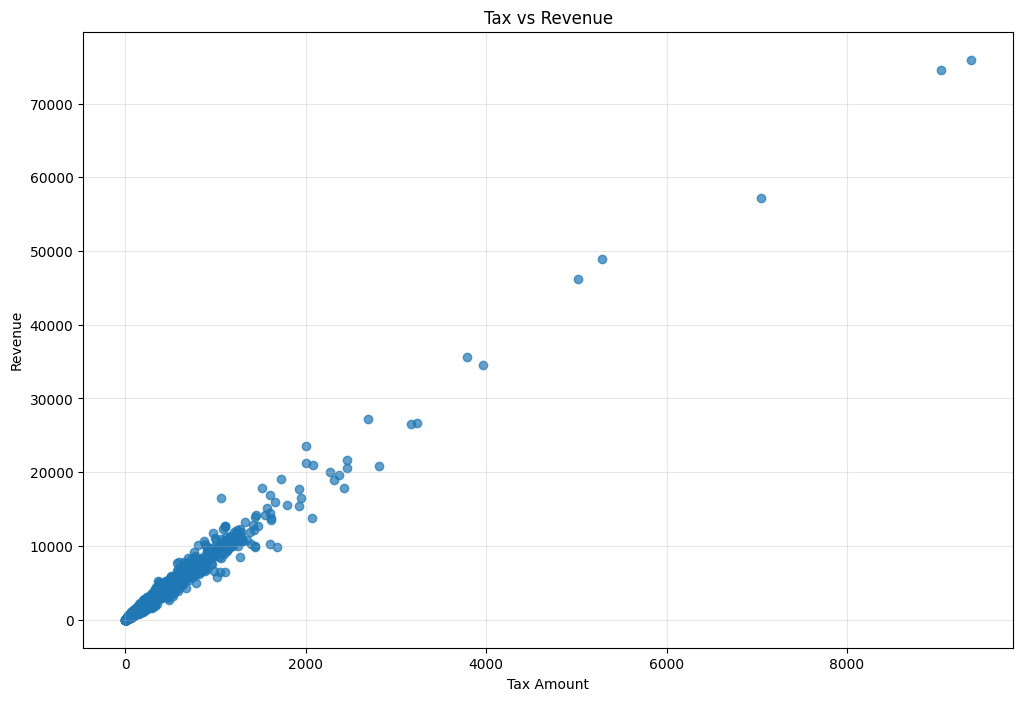

In [203]:
# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(aggregated_tax_and_delivery_data_per_customer['Tax_Amount'],
          aggregated_tax_and_delivery_data_per_customer['Revenue'],
          alpha=0.7)
plt.title("Tax vs Revenue")
plt.xlabel("Tax Amount")
plt.ylabel("Revenue")
plt.grid(alpha=0.3)
plt.show()

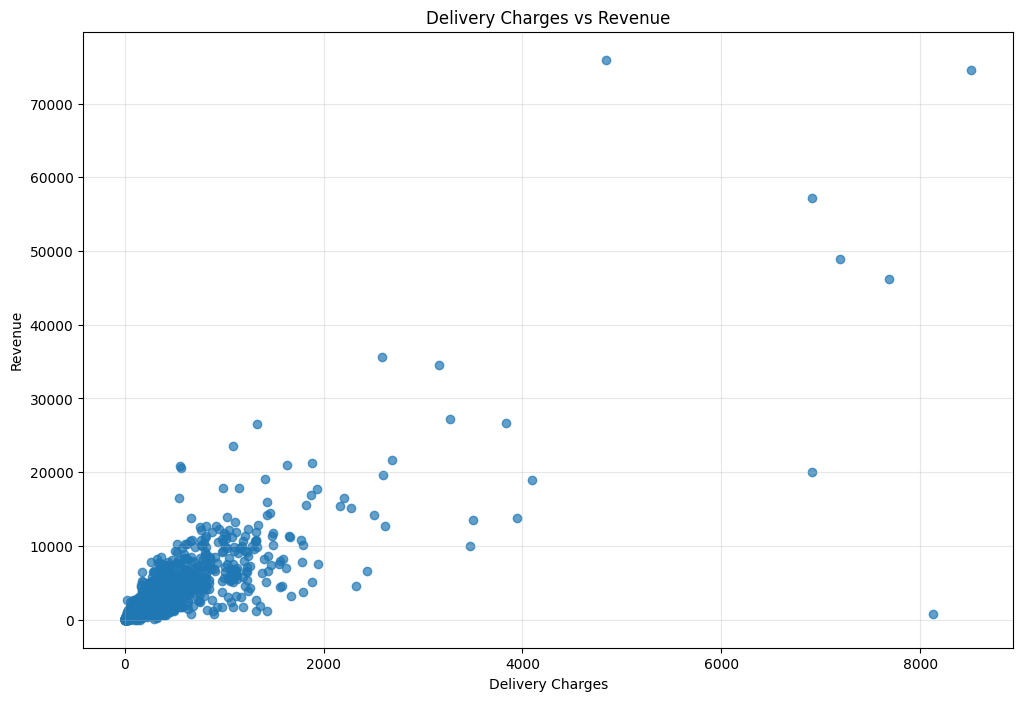

In [204]:
# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(aggregated_tax_and_delivery_data_per_customer['Delivery_Charges'],
          aggregated_tax_and_delivery_data_per_customer['Revenue'],
          alpha=0.7)
plt.title("Delivery Charges vs Revenue")
plt.xlabel("Delivery Charges")
plt.ylabel("Revenue")
plt.grid(alpha=0.3)
plt.show()

 Tax vs Revenue: The plot shows that customer making higher purchases spend higher on taxes.
 Delivery Charges vs Revenue: The plot shows there is not a strong relationship between delivery charges and revenue. To increase the order
 size, delivery charges can be optimized.

 Case 19 - Seasonal trends in sales by category and location

In [205]:
print(f"Sales Data:\n {df_sales_data.head()}")
# Extract month from Transaction date
df_sales_data['Month'] = df_sales_data['Transaction_Date'].dt.month
print(f"\nSales Data with Month:\n {df_sales_data.head()}")
customers_by_location = pd.read_excel('/content/CustomersData.xlsx')
print(f"\nCustomers Data:\n {customers_by_location.head()}")

Sales Data:
    CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679       2019-01-01  GGOENEBJ079499   
1       17850           16680       2019-01-01  GGOENEBJ079499   
2       17850           16681       2019-01-01  GGOEGFKQ020399   
3       17850           16682       2019-01-01  GGOEGAAB010516   
4       17850           16682       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  Revenue  
0         1     153.71               6.5          Used   153.71  
1         1     153

In [206]:
# Merge sales data to customers data
df_merged = df_sales_data.merge(customers_by_location, on='CustomerID', how='left')
df_merged.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Revenue,Month,Gender,Location,Tenure_Months
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,153.71,1,M,Chicago,12
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,153.71,1,M,Chicago,12
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,2.05,1,M,Chicago,12
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,87.65,1,M,Chicago,12
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,16.50,1,M,Chicago,12


In [207]:
# Merge data
merged_customers_data = df_merged.groupby(['Month', 'Product_Category', 'Location'])['Revenue'].sum().reset_index()
print(f"Product category with location\n {merged_customers_data.head()}")

Product category with location
    Month Product_Category    Location   Revenue
0      1      Accessories     Chicago     51.57
1      1          Android  California     37.12
2      1          Android     Chicago     16.50
3      1          Android    New York     20.62
4      1          Apparel  California  14487.82


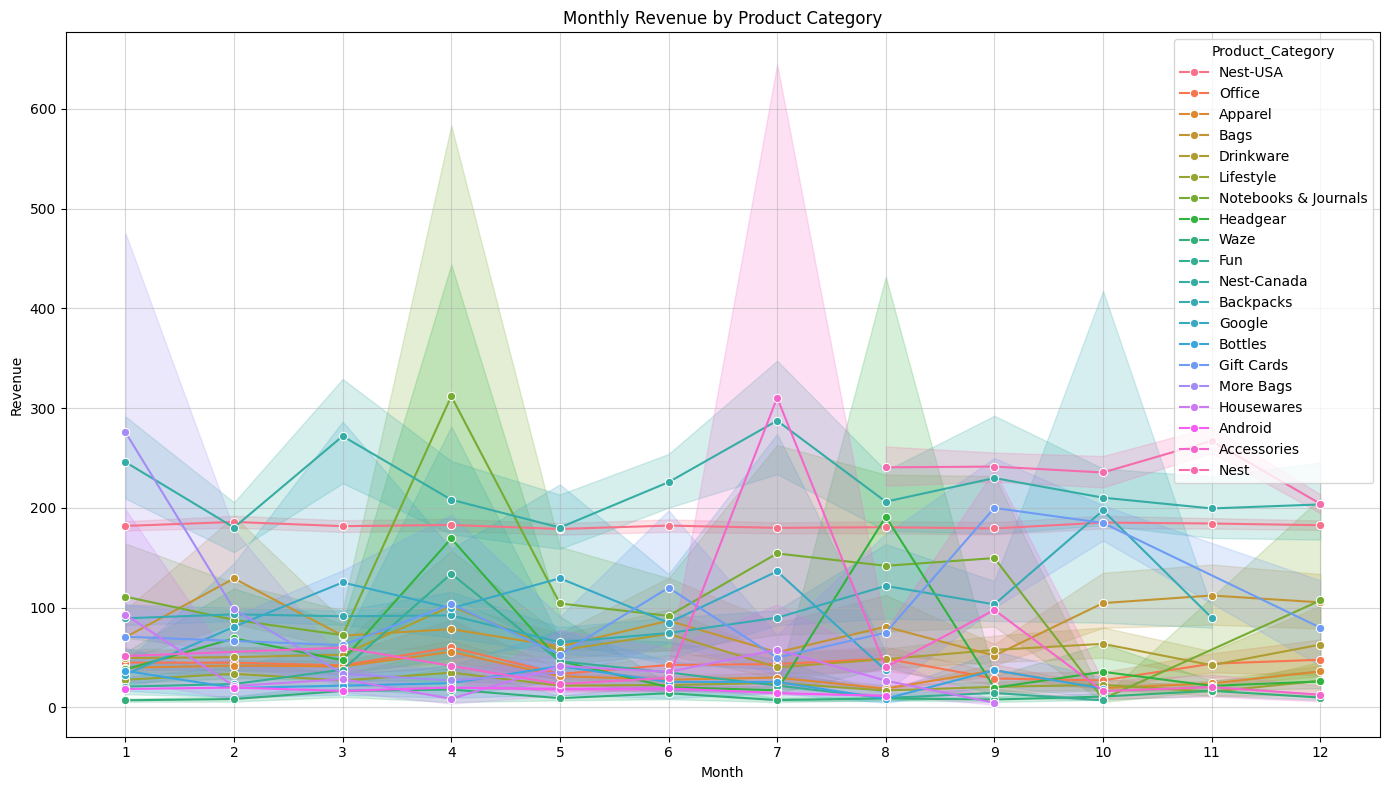

In [208]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='Month', y='Revenue', hue='Product_Category', data=df_merged, marker='o')
plt.title('Monthly Revenue by Product Category')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(alpha=0.5)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

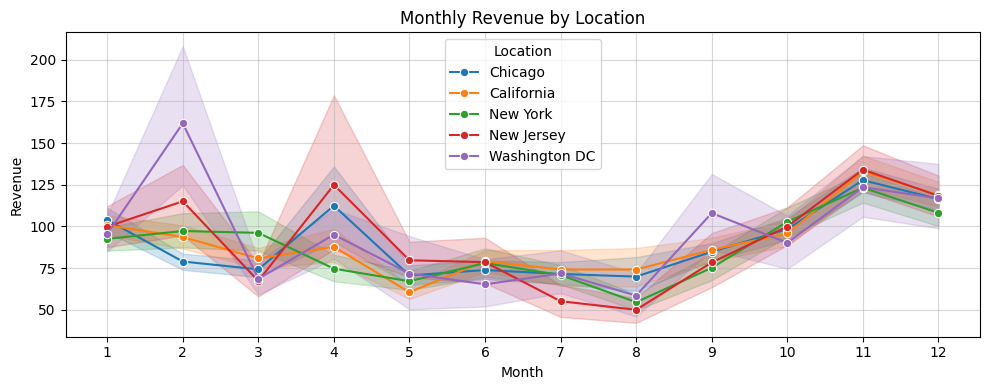

In [209]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='Month', y='Revenue', hue='Location', data=df_merged, marker='o')
plt.title('Monthly Revenue by Location')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(alpha=0.5)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

 From the above analysis, the company can prepare for peak and off-peak seasons to maximize revenue by stocking up the the categories of
 products before peak season. Stocking more on the locations the specific products are likely to be sold.
